<a href="https://colab.research.google.com/github/devadharshini2005/pneumonia-prediction-using-deep-learning/blob/main/densenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Define directories for train and validation data
train_dir = '/content/drive/MyDrive/archive (2)/chest_xray/train'
validation_dir = '/content/drive/MyDrive/archive (2)/chest_xray/test'

# Define ImageDataGenerators for train and validation data
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Load pre-trained DenseNet121 model without top layer
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Build model on top of DenseNet121
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # Adjust based on your number of classes
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=25
)



Found 3404 images belonging to 2 classes.
Found 176 images belonging to 2 classes.
29084464/29084464 [==============================] - 0s 0us/step
Epoch 1/25
106/106 [==============================] - 590s 5s/step - loss: 1.2900 - accuracy: 0.9009 - val_loss: 2.1677 - val_accuracy: 0.6812
Epoch 2/25
106/106 [==============================] - 51s 486ms/step - loss: 0.1543 - accuracy: 0.9555 - val_loss: 0.3680 - val_accuracy: 0.8813
Epoch 3/25
106/106 [==============================] - 49s 465ms/step - loss: 0.1030 - accuracy: 0.9632 - val_loss: 0.3600 - val_accuracy: 0.8938
Epoch 4/25
106/106 [==============================] - 57s 542ms/step - loss: 0.0968 - accuracy: 0.9647 - val_loss: 0.3638 - val_accuracy: 0.8875
Epoch 5/25
106/106 [==============================] - 50s 467ms/step - loss: 0.0863 - accuracy: 0.9683 - val_loss: 0.4159 - val_accuracy: 0.8687
Epoch 6/25
106/106 [==============================] - 52s 492ms/step - loss: 0.0733 - accuracy: 0.9739 - val_loss: 0.5529 - val_a

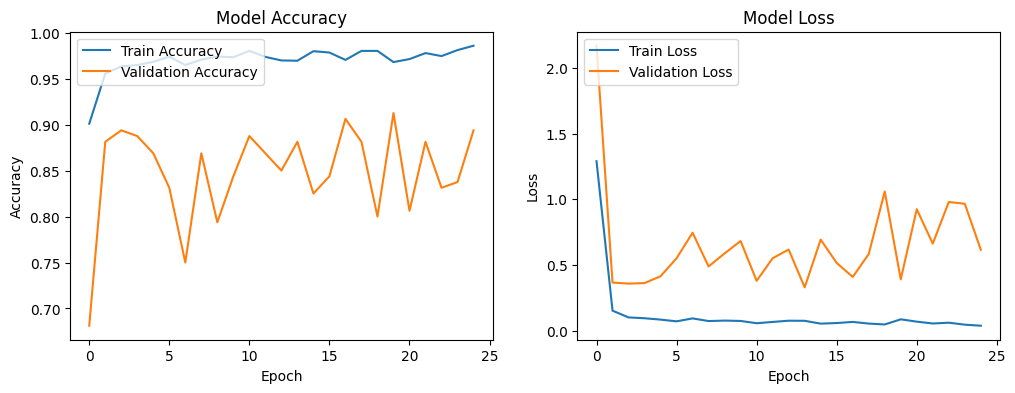

Final Training Accuracy: 0.9858
Final Validation Accuracy: 0.8938
5/5 [==============================] - 3s 550ms/step - loss: 0.6241 - accuracy: 0.8938
Validation Loss: 0.6241
Validation Accuracy: 0.8938


In [ ]:
# Plotting training & validation accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()

# Extract final training and validation accuracy
final_train_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]

# Print the final accuracies
print(f"Final Training Accuracy: {final_train_accuracy:.4f}")
print(f"Final Validation Accuracy: {final_val_accuracy:.4f}")

# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Ensure the validation generator is reset
validation_generator.reset()

# Make predictions
predictions = model.predict(validation_generator, steps=validation_generator.samples // validation_generator.batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)

# True labels
true_classes = validation_generator.classes

# Class labels
class_labels = list(validation_generator.class_indices.keys())

# Generate classification report
report = classification_report(true_classes, predicted_classes[:len(true_classes)], target_names=class_labels)
print(report)


6/6 [==============================] - 6s 920ms/step
              precision    recall  f1-score   support

      NORMAL       0.43      0.33      0.38        78
   PNEUMONIA       0.55      0.65      0.60        98

    accuracy                           0.51       176
   macro avg       0.49      0.49      0.49       176
weighted avg       0.50      0.51      0.50       176

